In [1]:
# Xarray wip

In [2]:
import datetime
#import numpy
#import xarray
#import rasterio
from lilcubeLib.lc_api import Lilcube
#from noteLib import ge_translate

In [3]:
from lilcubeLib.lc_xarray import AOI_bounding_box, Xpart
from lilcubeLib.lc_xarray import build_the_xarray

In [4]:
aoi = AOI_bounding_box((30.209661,-2.218817,30.246396,-2.163926))

In [5]:
date_range = (datetime.datetime(2013,7,6), datetime.datetime(2013,7,7))
# date_range = (datetime(2013,7,6), datetime(2018,7,7))

es_index = 'datacube'
es_type = 'rwanda'

lc = Lilcube()

measurements = ('red','green','blue',)

# return a pandas data frame product id creation date and red
panda_df = lc.search(es_index, es_type, (aoi.ul_lat, aoi.ul_lon), (aoi.lr_lat, aoi.lr_lon),
             time = date_range, measurements = measurements )

creating Lilcube class
Yay Connect


In [6]:
%%time
ds = build_the_xarray(aoi.geobox, measurements, panda_df)



CPU times: user 444 ms, sys: 48 ms, total: 492 ms
Wall time: 533 ms


In [7]:
ds
ds2 = ds.sel(datePR=slice('2013-07-06_172_61', '2013-07-06_172_62'))

#ds.sel(datePR=slice('2013-07-06_172_61', '2013-07-06_172_62')).plot.imshow('x', 'y', col='time', col_wrap=4)

In [8]:
ds2

<xarray.Dataset>
Dimensions:  (datePR: 2, time: 2, x: 137, y: 204)
Coordinates:
  * datePR   (datePR) <U17 '2013-07-06_172_61' '2013-07-06_172_62'
  * time     (time) <U10 '2013-07-06' '2013-07-06'
  * y        (y) float64 -2.394e+05 -2.395e+05 ... -2.455e+05 -2.455e+05
  * x        (x) float64 1.896e+05 1.896e+05 1.897e+05 ... 1.937e+05 1.937e+05
Data variables:
    red      (datePR, y, x) int16 792 1142 1102 1048 1017 ... 441 438 434 435
    green    (datePR, y, x) int16 682 835 827 808 787 ... 501 494 498 491 494
    blue     (datePR, y, x) int16 417 524 528 515 495 ... 408 412 408 410 409
Attributes:
    crs:      epsg:32636

In [9]:
# dir(ds2)

In [10]:
display_color='red'
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='tab20')

https://matplotlib.org/examples/color/colormaps_reference.html

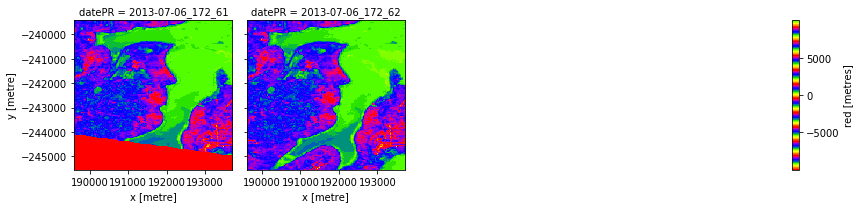

In [11]:
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

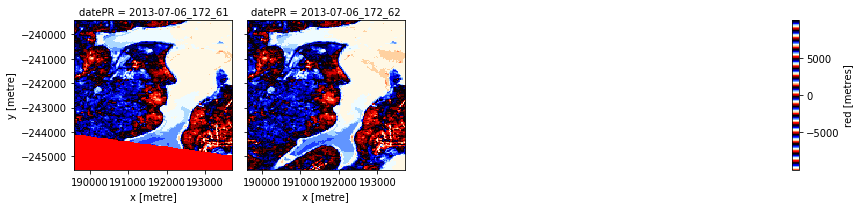

In [12]:
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='flag')

In [13]:
# ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='gist_stern')

In [14]:
# ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='viridis')

In [15]:
!date

Sat Jan 19 16:17:05 CST 2019


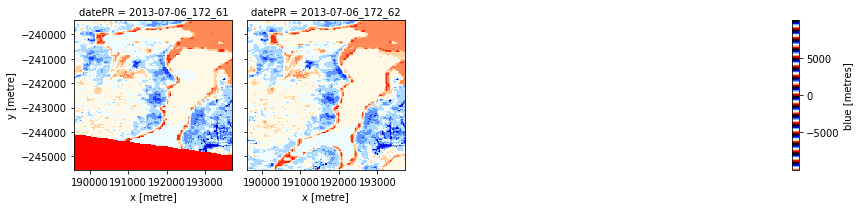

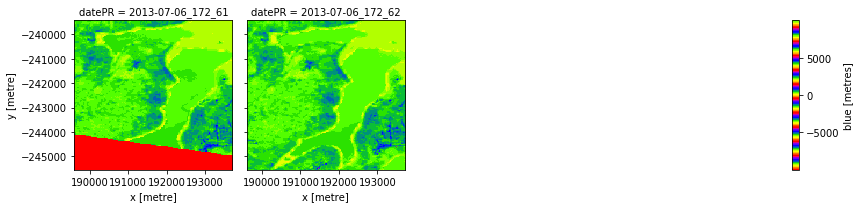

In [16]:
display_color='blue'
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='flag')
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

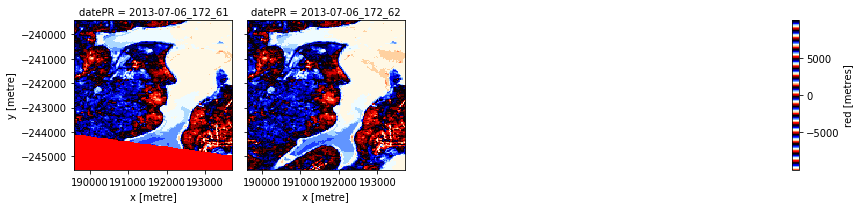

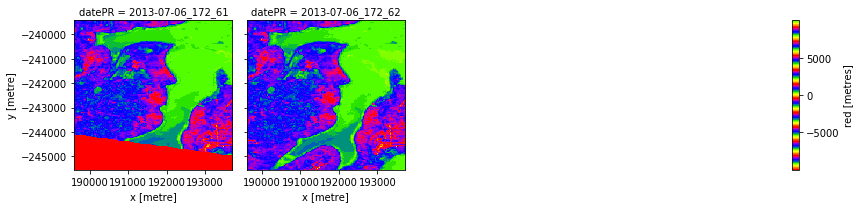

In [17]:
display_color='red'
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='flag')
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

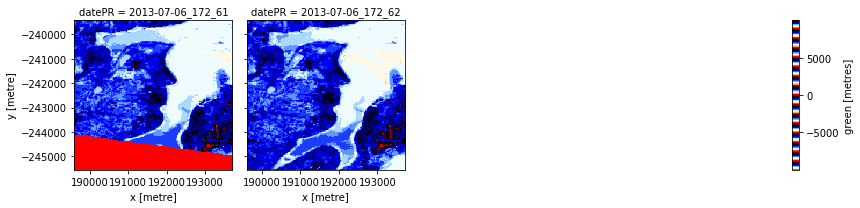

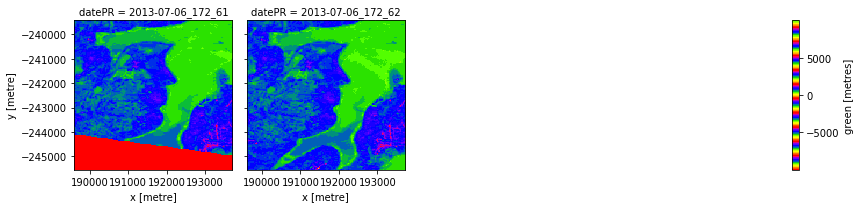

In [18]:
display_color='green'
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='flag')
ds2[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')

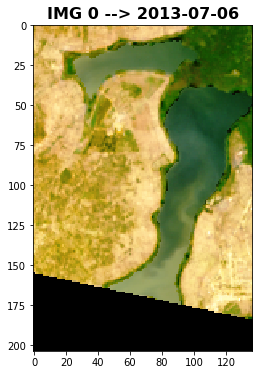

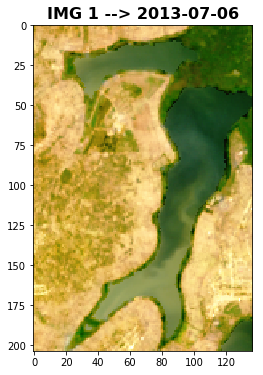

In [19]:
from noteLib import *
%matplotlib inline
for t in range(0,len(ds2.datePR)):
    cnt=t
    figsize=[6,6]
    plot_labeled_rgb(ds2, t, cnt, figsize=figsize)